# Исследование продажи игр

<div style="border: 1px solid; padding: 20px">
<i>Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.<i>
</div>

## Описание данных

*Name* — название игры
<br>*Platform* — платформа
<br>*Year_of_Release* — год выпуска
<br>*Genre* — жанр игры
<br>*NA_sales* — продажи в Северной Америке (миллионы проданных копий)
<br>*EU_sales* — продажи в Европе (миллионы проданных копий)
<br>*JP_sales* — продажи в Японии (миллионы проданных копий)
<br>*Other_sales* — продажи в других странах (миллионы проданных копий)
<br>*Critic_Score* — оценка критиков (максимум 100)
<br>*User_Score* — оценка пользователей (максимум 10)
<br>*Rating* — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Изучаем общую информацию о данных

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
# установим библиотеку scikit-posthocs в окружение и импортируем
%pip install scikit-posthocs

import scikit_posthocs as sp

Note: you may need to restart the kernel to use updated packages.


In [3]:
pth = '/datasets/games.csv'

if os.path.exists(pth):
    data = pd.read_csv(pth)
else:
    try:
        data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
    except:
        print('Что-то пошло не так...')
        
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# сохраним количество строк в датафрейме до предобработки (это значение понадобится нам позже)
df_row_number = data.shape[0]
print('Кол-во строк в исходном наборе данных:',df_row_number)

Кол-во строк в исходном наборе данных: 16715


In [6]:
# проверим наличие явнях дубликатов в данных
data.duplicated().sum()

0

In [7]:
data.duplicated(subset=['Name', 'Platform']).sum()

5

In [8]:
data[data.duplicated(subset=['Name', 'Platform'])]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.0,0.48,0.00,0.00,43.0,4.1,E10+
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E


In [9]:
data = data.drop(index=[16230])

In [10]:
data.query('(Name == "Need for Speed: Most Wanted")')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


<div class="alert alert-info">

<b> 🦄 Комментарий </b> 

Забавно, показывает, что при отборе по столбцам 'Name' и 'Platform' есть дубликаты. Для "Sonic the Hedgehog" этот дубликат будет удален позже, когда уйдут все строки с незаполненными NaN в дате релиза. Для "Madden NFL 13" - удалим руками, там, видимо, какая-то ошибка при выгрузке или что-то подобное, заполнены только продажи в EU, да и то маленькие. А вот "Need for Speed: Most Wanted" - это ремейк, которой был выпущен в 2012 году и, мягко говоря, не впечатлил игроков (меня, кстати, тоже), так что его нужно будет оставить.
</div>

<div style="border-radius: 15px; background:BlanchedAlmond; padding: 20px">

📜 Итог после изучения общей информации:
- необходимо изменить названия столбцов (привести к нижнему регистру)
- преобразовать типы данных для столбцов 'Year_of_Release' и 'User_Score' 
- бработать пропуски  в столбцах 'Name', 'Year_of_Release', 'Genre', 'Critic_Score', 'User_Score' и 'Rating', где это возможно, или оставить их без изменений

</div>

## Предобрабатываем данные

### Заменим названия столбцов

In [6]:
# приведем названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()

### Преобразуем данные в нужные типы и обработаем пропуски

In [12]:
# посмотрим на количество пропусков  в данных
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

2 пропущеных значения в колоне 'name' (и связанные с ними пропуски в колонках 'genre', 'critic_score', 'user_score', 'rating') не получится заполнить на основании других данных таблицы. Строки с этими пропусками придется удалить.

In [13]:
data = data.dropna(subset=['name'])

In [14]:
# проверим колонку 'platform' на неявные дубликаты, отсортируем в алфавитном порядке
np.sort(data.platform.unique())

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

In [15]:
# проверим колонку 'genre' на неявные дубликаты, отсортируем в алфавитном порядке
np.sort(data.genre.unique())

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

Неявные дубликаты в колонках 'platform' и 'genre' не обнаружены.

**Обогатим данные.** Так как год выхода игры на конкретной платформе - свершившееся событие, информацию о котором мы можем восстановить согласно открытым данным из сети Интернет, то для заполнения оставшихся пропусков года релиза игры ('year_of_release') найдем базу, по которой сможем пропуски в наших данных закрыть. Воспользуемся данными с kaggle.com, в частности нам подойдет датасет **"Top Video Games 1995-2021 Metacritic"** (https://www.kaggle.com/datasets/deepcontractor/top-video-games-19952021-metacritic), который, помимо прочего, содержит информацию о годах выхода различных игр.

In [16]:
sheet_url = "https://docs.google.com/spreadsheets/d/1BqXyI2HKrV10VknoKzyoB5YiU3jJJkX66f5kN1rhpmI/edit#gid=118397937"
url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

try:
    all_games = pd.read_csv(url)
except:
    print('Не удалось загрузить дополнительный набор данных!')

all_games = all_games[['name','release_date', 'platform']]
all_games.head()

,name,release_date,platform
0,The Legend of Zelda: Ocarina of Time,"November 23, 1998",Nintendo 64
1,Tony Hawk's Pro Skater 2,"September 20, 2000",PlayStation
2,Grand Theft Auto IV,"April 29, 2008",PlayStation 3
3,SoulCalibur,"September 8, 1999",Dreamcast
4,Grand Theft Auto IV,"April 29, 2008",Xbox 360


In [17]:
# напишем функцию, которая оставит только значение года в столбце 'release_date'
def all_games_year(row):
        row['release_date'] = row['release_date'][-4:]
        return row

all_games = all_games.apply(all_games_year, axis=1)

In [18]:
# посмотрим, какие названия для платформ хранятся в датафрейме all_games
np.sort(all_games.platform.unique())

array(['3DS', 'DS', 'Dreamcast', 'Game Boy Advance', 'GameCube',
       'Nintendo 64', 'PC', 'PSP', 'PlayStation', 'PlayStation 2',
       'PlayStation 3', 'PlayStation 4', 'PlayStation 5',
       'PlayStation Vita', 'Stadia', 'Switch', 'Wii', 'Wii U', 'Xbox',
       'Xbox 360', 'Xbox One', 'Xbox Series X'], dtype=object)

In [19]:
# заменим названия на те, что указаны в нашем датафрейме data
to_replace = {
    r'(\b)PlayStation 4(\b)': r'PS4',
    r'(\b)PlayStation 3(\b)': r'PS3',
    r'(\b)PlayStation 2(\b)': r'PS2',
    r'(\b)PlayStation Vita(\b)': r'PSV',
    r'(\b)PlayStation(\b)': r'PS',
    r'(\b)Wii U(\b)': r'WiiU',
    r'(\b)Xbox 360(\b)': r'X360',
    r'(\b)Xbox One(\b)': r'XOne',
    r'(\b)Xbox(\b)': r'XB',
    r'(\b)Game Boy Advance(\b)': r'GBA',
    r'(\b)GameCube(\b)': r'GC',
    r'(\b)Dreamcast(\b)': r'DC',
    r'(\b)Nintendo 64(\b)': r'N64'    
}

all_games['platform'] = all_games['platform'].replace(to_replace, regex=True)

In [20]:
# объединим значения года релиза игры ('release_date') из all_games с данными из data соотнеся названия игр ('name') и платформу ('platform')
data = data.merge(all_games, on=['name', 'platform'], how='left')
data = data.loc[data['release_date'] != '2019']

In [21]:
# напишем функцию, которая заменит NaN в 'year_of_release' на значение из 'release_date'
def year_of_release_fix_nan(row):
        if row['year_of_release'] != row['year_of_release']:
            row['year_of_release'] = row['release_date']
        return row

data = data.apply(year_of_release_fix_nan, axis=1)
data = data.drop(columns='release_date')

In [22]:
# посмотрим, сколько пропусков в 'year_of_release' осталось
data.isna().sum().year_of_release

167

Таким образом нам удалось заполнить часть пропусков в столбце 'year_of_release' информацией из стороннего источника.

In [23]:
# удалим строки, в которых нам так и не удалось восстановить пропущенные значения 'year_of_release'
data = data.dropna(subset=['year_of_release'])

In [24]:
# приведем значения 'year_of_release' к типу 'int'
data['year_of_release'] = data['year_of_release'].astype('int64')

В столбце с оценкой пользователей 'user_score' встречается аббревиатура 'tbd'.
>*Обозначение "To Be Determined" (TBD) относится к вопросу, который еще неизвестен, или к чему-то, что еще не решено, но будет известно в будущем.*

Заменим все значения 'tbd' в ячейках на NaN

In [25]:
# напишем функцию, которая заменит 'tbd' в 'user_score' на NaN
def user_score_fix_tbd(row):
        if row['user_score'] == 'tbd':
            row['user_score'] = np.nan
        return row

data = data.apply(user_score_fix_tbd, axis=1)

In [26]:
# приведем значения 'user_score' к типу 'float'
data['user_score'] = data['user_score'].astype('float')

### Посчитаем суммарные продажи во всех регионах

In [27]:
# подсчитаем и добавим в таблицу суммарные продажи во всех регионах
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

### Проверим данные на начичие выбросов

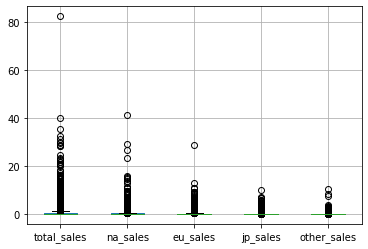

In [28]:
# с помощью графика boxplot посмотрим, на сколько равномерно распределены продажи, нет ли завышенных/заниженных значений
data.boxplot(column=['total_sales', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales'])
plt.show;

Видим экстримально высокие значения среди представленных данных. Однако, мы не можем быть точно уверены: это выбросы, или просто очень популярные игры, пользующиеся большим спросом.

### Заключение

In [29]:
# проверим, не появлились ли случайно в данных дубликаты при проведении предобработки
data.duplicated().sum()

37

In [30]:
# удалим дубликаты
data = data.drop_duplicates()

In [31]:
# смотрим, в каких столбцах остались неисправленные пропуски
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8465
user_score         8994
rating             6681
total_sales           0
dtype: int64

Оставшиеся в данных пропуски возникли, скорее всего, из-за того, что указанные поля были необязательными при заполнении базы, определенная информация могла быть недоступна на момент заполнения базы (оценки пользователей, рейтинг) или из-за того, что при выгрузке данных произошли ошибки. Исправить эти пропуски не представляется возможным.

In [32]:
# посчитаем, сколько данных мы сохранили после этапа предобработки
print('Сохранено', (data.shape[0]/df_row_number * 100), '% от исходных данных')

Сохранено 98.97696679629075 % от исходных данных


In [33]:
# напишем функцию, которая заполнит пропуски в 'rating' на 'undefined'
def rating_fix(row):
        if row['rating'] != row['rating']:
            row['rating'] = 'undefined'
        return row

data = data.apply(rating_fix, axis=1)

In [34]:
# посмотрим, какие теперь уникальные значения присутствуют в столбце rairing
np.sort(data.rating.unique())

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', 'undefined'],
      dtype=object)

<div style="border-radius: 15px; background:BlanchedAlmond; padding: 20px">

📜 Итог после проведения предобработки данных:
- были устранены пропуски в столбцах 'Name', 'Year_of_Release' и 'Genre'
- пропуски в столбцах 'Critic_Score', 'User_Score' и 'Rating' заполнить не представляется возможным
- чуть более 1% данных было потеряно во время предобработки

</div>

## Исследуем данные

### Посмотрим, сколько игр выпускалось в разные годы 

In [35]:
# посмотрим на топ-10 лет по количеству выпущенных игр
game_per_year = data\
                    .rename(columns={'name': 'Кол-во выпущенных игр', 'year_of_release': 'Год релиза'})\
                    .pivot_table(index='Год релиза', values='Кол-во выпущенных игр', aggfunc='count')\
                    .sort_values(by='Кол-во выпущенных игр', ascending=False)\
                    .reset_index()\

display(game_per_year.head(10))

,Год релиза,Кол-во выпущенных игр
0,2008,1437
1,2009,1431
2,2010,1265
3,2007,1203
4,2011,1151
5,2006,1012
6,2005,949
7,2002,842
8,2003,785
9,2004,768


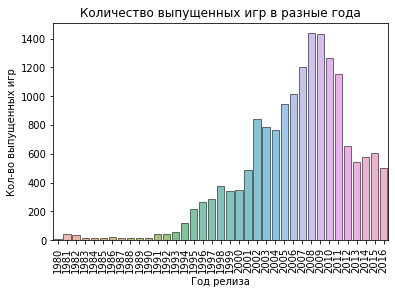

In [36]:
# построим столбчатую диаграмму
ax = sns.barplot(data=game_per_year, x='Год релиза', y='Кол-во выпущенных игр', alpha=.7, edgecolor='.2')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Количество выпущенных игр в разные года");

Исходя из представленных данных видно, что для дальнейшей работы есть смысл анализировать только те игры, которые были выпущены после 2000 года, когда наблюдался значительный рост интереса аудитории к игровым проектам на приставках и портативных игровых устройствах.Также из данных на графике можно заметить спад количества выпускаемых игр на анализируемых платформах после 2008 года. Предположительно, это можно связать с потерей интереса у аудитории (развитие мобильного гейминга, облачного гейминга, широким распространением онлайн проектов для PC).

In [37]:
# отфильтруем наши данные, оставим только игры, выпущенные после 2000 года
data_new = data\
                .query('year_of_release >= 2000')\
                .reset_index(drop=True)

### Посмотрим, как менялись продажи по платформам

In [38]:
# посмотрим на топ-10 платформ по количеству проданых игр за все время
data\
        .rename(columns={'total_sales': 'Число проданых копий, млн.', 'platform': 'Платформа'})\
        .pivot_table(index='Платформа', values='Число проданых копий, млн.', aggfunc='sum')\
        .sort_values(by='Число проданых копий, млн.', ascending=False)\
        .reset_index()\
        .head(10)

,Платформа,"Число проданых копий, млн."
0,PS2,1248.46
1,X360,970.48
2,PS3,937.81
3,Wii,904.07
4,DS,804.09
5,PS,728.79
6,GBA,314.77
7,PS4,314.14
8,PSP,290.37
9,PC,258.71


В дальнейшем рассмотрим подробнее только самые успешные платформы по кол-ву проданых копий игр: PS2, X360, PS3, Wii, DS.

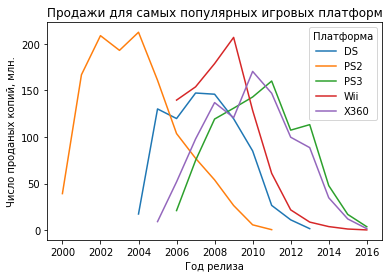

In [39]:
# построим график, который будет отражать изменение кол-ва продаваемых копий игр начиная с 2000 года для топ-5 платформ
sales_per_platform = data_new\
                            .query('(platform == "PS2")\
                                    | (platform == "X360")\
                                    | (platform == "PS3")\
                                    | (platform == "Wii")\
                                    | (platform == "DS")')\
                            .reset_index(drop=True)\
                            .groupby(['platform', 'year_of_release'], as_index=False)\
                            .agg({'total_sales': 'sum'})

sns.lineplot(data=sales_per_platform, x='year_of_release', y='total_sales', hue='platform')
plt.legend(title='Платформа', fontsize=10)
plt.title("Продажи для самых популярных игровых платформ")
plt.xlabel('Год релиза', fontsize=10)
plt.ylabel('Число проданых копий, млн.', fontsize=10);

Исходя из представленных на графике данных видно, что в новые платформы появляются и начинают набирать популярность (постепенно сменяя старые) примерно каждые 2-4 года. Срок жизни игровой платформы в среднем составлят примерно 9-10 лет.

### Выберем актуальный период  и потенциально прибыльные платформы для дальнейшего анализа

**Актуальный период** определим исходя из общего интереса аудитории к игровым проектам на всех представленных в данных платформах. Основной фактор - эти данные должны позволять построить прогноз на 2017 год.
<br>
<br>Мы знаем, исходя из ренее полученных данных, что количество выпускаемых игр для приставок и портативных игровых устройств начало сокращаться после 2008 года. Также такие приставки как 3DS, PS4, PSV, WiiU и XOne были выпущены после 2008 года, соответственно могут пока уступать консолям прошлых поколений, которые присутствуют на рынке дольше, по количеству проданых игр. Стоит учесть, что новые консоли всегда более перспективны с точки зрения разработки и последующей продажи игр, а также пользуются большим спросом у геймеров. Таким образом, чтобы сохранить тренд на уменьшение количества выпускаемых игр и учесть факт появления новых консолей, при построении прогноза ограничимся данными за последние 5 лет (2011-2016 года). 

In [40]:
actual_data = data_new[data_new['year_of_release'] >= 2011].reset_index(drop=True)

In [41]:
# посмотрим на топ-5 платформ по количеству проданых игр за актуальный период
actual_data\
        .rename(columns={'total_sales': 'Число проданых копий, млн.', 'platform': 'Платформа'})\
        .pivot_table(index='Платформа', values='Число проданых копий, млн.', aggfunc='sum')\
        .sort_values(by='Число проданых копий, млн.', ascending=False)\
        .reset_index()\
        .head()

,Платформа,"Число проданых копий, млн."
0,PS3,448.88
1,X360,383.52
2,PS4,314.14
3,3DS,258.21
4,XOne,159.32


Для дальнейшего анализа взьмем только потенциально прибыльные платформы. Как можно видеть из таблицы, после 2011 года в пятерку лидеров по популярности (и, соответсвенно, по продажам) выбились игры для PS4, 3DS и XOne, а игры для PS2, Wii и DS стали терять в популярности, при этом игры для X360 и PS3 все также остаются прибыльными.

In [42]:
actual_data_top5 = actual_data[actual_data['platform'].isin(['PS3','X360','PS4','3DS','XOne'])]

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

In [43]:
# посчитаем границы "усов ящика" для 'total_sales' в целом (без учета платформы)
Q1 = actual_data_top5['total_sales'].quantile(0.25)
Q3 = actual_data_top5['total_sales'].quantile(0.75)
IQR = Q3 - Q1
print('Нижний 1,5*IQR ус:',Q1 - IQR * 1.5,'\nВерхний 1,5*IQR ус:', Q3 + IQR * 1.5)

Нижний 1,5*IQR ус: -0.78 
Верхний 1,5*IQR ус: 1.4600000000000002


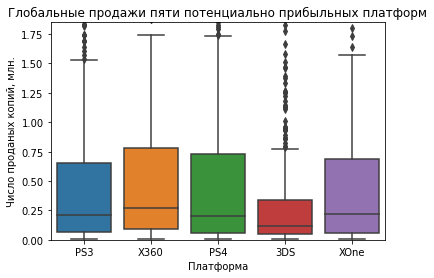

In [44]:
# почистим столбец 'total_sales' от выбросов и построим график boxplot для каждой из потенциально прибыльных платформ
sns.boxplot(data=actual_data_top5, x='platform', y='total_sales')
plt.ylim(top=1.85, bottom=0)
plt.title('Глобальные продажи пяти потенциально прибыльных платформ')
plt.xlabel('Платформа', fontsize=10)
plt.ylabel('Число проданых копий, млн.',fontsize=10);

Для формулировки точных выводов проведем попарные сравнения с целью проверки различий между средними. Теория статистики не требует применения методов, основанных на попарных сравнениях, исключительно после того, как дисперсионный анализ (ANOVA) установил наличие существенной разницы между группами в целом (хотя это и рекомендуется). В нашем случае, проведет тест Ливиня (Levene's test) для оценки равенства дисперсий. При условии соблюдения равенста дисперсий воспользуемся тестом Тьюки (Tukey's test), в противном случае - тестом Т2 Тамхейна (Tamhane T2 test). 

In [45]:
actual_data_top5_for_test = actual_data_top5[actual_data_top5['total_sales'] < 1.5]

In [46]:
# проведем тест Ливиня
st.levene(actual_data_top5_for_test.query('platform == "XOne"').total_sales,\
                   actual_data_top5_for_test.query('platform == "PS4"').total_sales,\
                   actual_data_top5_for_test.query('platform == "PS3"').total_sales,\
                   actual_data_top5_for_test.query('platform == "X360"').total_sales,\
                   actual_data_top5_for_test.query('platform == "3DS"').total_sales)

LeveneResult(statistic=9.877152171184624, pvalue=6.447954439774086e-08)

p-value << 0.05, что указывает на то, что группы имеют статистически значимую разницу в своей изменчивости. 

In [47]:
# проведем тест Т2 Тамхейна
sp.posthoc_tamhane(actual_data_top5_for_test, val_col='total_sales', group_col='platform')

,XOne,PS4,PS3,X360,3DS
XOne,1.000000,0.296926,9.999976e-01,9.372009e-01,1.333911e-03
PS4,0.296926,1.000000,3.824729e-02,4.454734e-03,1.163548e-01
PS3,0.999998,0.038247,1.000000e+00,8.551929e-01,5.325964e-08
X360,0.937201,0.004455,8.551929e-01,1.000000e+00,6.784838e-09
3DS,0.001334,0.116355,5.325964e-08,6.784838e-09,1.000000e+00


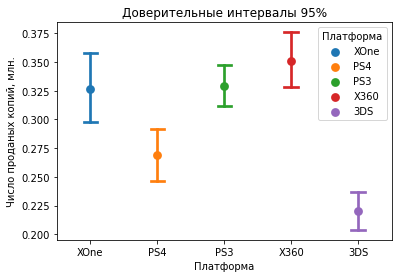

In [48]:
sns.pointplot(data=actual_data_top5_for_test, x='platform', y='total_sales', hue='platform', ci=80, join=False, capsize=.2)
plt.title('Доверительные интервалы 95%')
plt.legend(title='Платформа', fontsize=10)
plt.xlabel('Платформа', fontsize=10)
plt.ylabel('Число проданых копий, млн.',fontsize=10);

Установлены статистически достоверные различия (alpha = 0.05) в количестве проданых копий игр для пар:
- XOne-3DS (количество проданых игр на XOne значимо больше); 
- PS4-PS3 (количество проданых игр на PS3 значимо больше); 
- PS4-X360 (количество проданых игр на X360 значимо больше); 
- PS4-3DS (количество проданых игр на PS4 значимо больше);
- X360-3DS (количество проданых игр на X360 значимо больше);
- PS3-3DS (количество проданых игр на PS3 значимо больше).

### Посмотрим, как влияют на продажи отзывы пользователей и критиков

In [49]:
# напишем функцию для оценки корреляции между 'total_sales', 'user_score' и 'critic_score' в зависимости от интересующего нас параметра (типа игровой платформы)
def other_platform_matrix(platform):
    platform_name = actual_data_top5[actual_data_top5['platform'] == platform]
    platform_name = platform_name.rename(columns={'platform': 'Платформа',
                                                  'user_score': 'Оценка пользователей',
                                                  'total_sales': 'Число проданых копий, млн.',
                                                  'critic_score': 'Оценка критиков'})
    
    sns.pairplot(
        data=platform_name, 
        hue='Платформа',
        height=3.5,
        x_vars=['Оценка критиков', 'Оценка пользователей'], 
        y_vars='Число проданых копий, млн.'
    );

    user_sales_corr = platform_name['Оценка пользователей'].corr(platform_name['Число проданых копий, млн.'])
    critic_sales_cor = platform_name['Оценка критиков'].corr(platform_name['Число проданых копий, млн.'])
    
    print('Корреляция между отзывами критиков и игровой платформой:', critic_sales_cor)
    print('Корреляция между отзывами игроков и игровой платформой:', user_sales_corr)

Корреляция между отзывами критиков и игровой платформой: 0.4169983280084017
Корреляция между отзывами игроков и игровой платформой: -0.06892505328279414


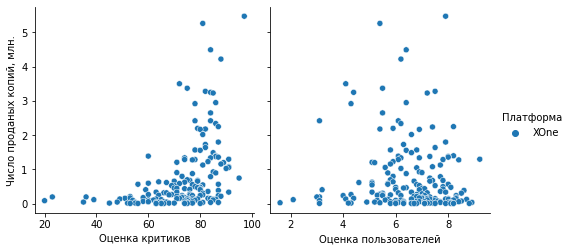

In [50]:
# для "XOne"
other_platform_matrix("XOne")

Корреляция между отзывами критиков и игровой платформой: 0.40656790206178095
Корреляция между отзывами игроков и игровой платформой: -0.031957110204556376


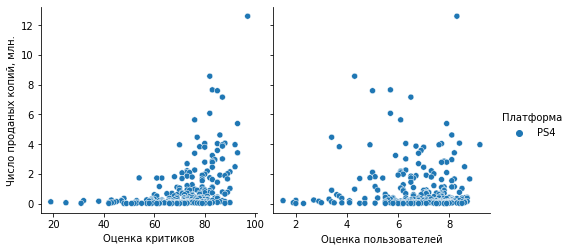

In [51]:
# для "PS4"
other_platform_matrix("PS4")

Корреляция между отзывами критиков и игровой платформой: 0.38169404076183017
Корреляция между отзывами игроков и игровой платформой: 0.013324234007821727


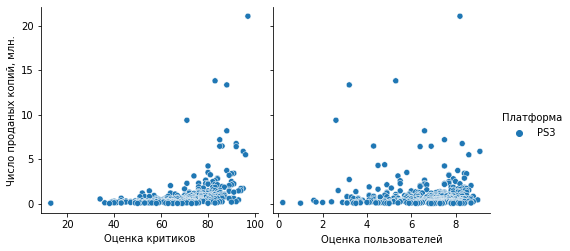

In [52]:
# для "PS3"
other_platform_matrix("PS3")

Корреляция между отзывами критиков и игровой платформой: 0.38963672747121275
Корреляция между отзывами игроков и игровой платформой: 0.038263270904884565


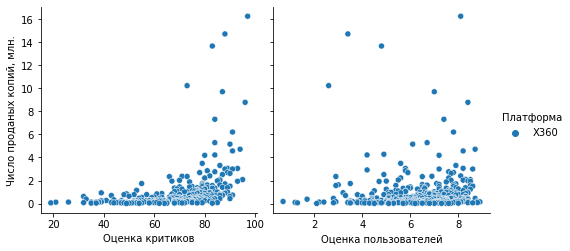

In [53]:
# для "X360"
other_platform_matrix("X360")

Корреляция между отзывами критиков и игровой платформой: 0.34821555174929825
Корреляция между отзывами игроков и игровой платформой: 0.222305117884012


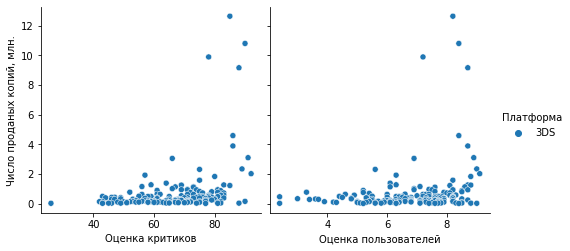

In [54]:
# для "3DS"
other_platform_matrix("3DS")

В среднем, по всем платформам кроме обнаруживается слабая положительная корреляция (значения от 0.34 до 0.42) между 'total_sales' и 'critic_score'. В свою очередь, исходя из значений корреляция для параметров 'total_sales' и 'user_score' для всех платформ, линейной связи между признаками не обнаружено (значения от -0.07 до 0.22).
<br>Можно сделать вывод, что не наблюдается прямая зависмость между оценками критиков или игроков и числом проданных копий игр для пяти рассмотренных платформ. Скорее всего ключевым фактором, влияющим на продажи, становится  какой-то иной неучтенный параметр.

### Посмотрим на общее распределение игр по жанрам

In [55]:
# посмотрим, сколько игр было выпущено в каждом из жанров за актуальный период
game_per_genre = actual_data\
                    .rename(columns={'name': 'Кол-во выпущенных игр', 'genre': 'Жанр'})\
                    .pivot_table(index='Жанр', values='Кол-во выпущенных игр', aggfunc='count')\
                    .sort_values(by='Кол-во выпущенных игр', ascending=False)\
                    .reset_index()

display(game_per_genre)

,Жанр,Кол-во выпущенных игр
0,Action,1280
1,Role-Playing,467
2,Adventure,410
3,Sports,388
4,Misc,375
5,Shooter,329
6,Racing,183
7,Fighting,159
8,Simulation,136
9,Platform,122


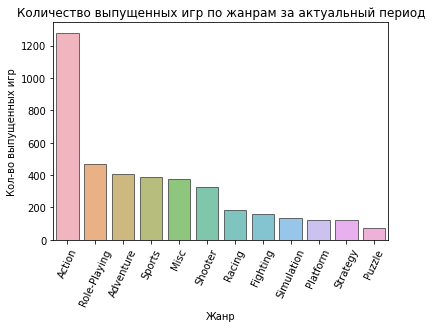

In [56]:
# построим столбчатую диаграмму
ax = sns.barplot(data=game_per_genre, x='Жанр', y='Кол-во выпущенных игр', alpha=.7, edgecolor='.2')
ax.set_xticklabels(ax.get_xticklabels(), rotation=65)
plt.title("Количество выпущенных игр по жанрам за актуальный период");

In [57]:
# посмотрим, сколько игр было продано в каждом из жанров за актуальный период
sales_per_genre = actual_data\
                    .rename(columns={'total_sales': 'Число проданых копий, млн.', 'genre': 'Жанр'})\
                    .pivot_table(index='Жанр', values='Число проданых копий, млн.', aggfunc='sum')\
                    .sort_values(by='Число проданых копий, млн.', ascending=False)\
                    .reset_index()

display(sales_per_genre)

,Жанр,"Число проданых копий, млн."
0,Action,564.42
1,Shooter,402.91
2,Role-Playing,246.31
3,Sports,237.14
4,Misc,139.42
5,Racing,89.81
6,Platform,88.68
7,Fighting,66.90
8,Simulation,50.26
9,Adventure,45.04


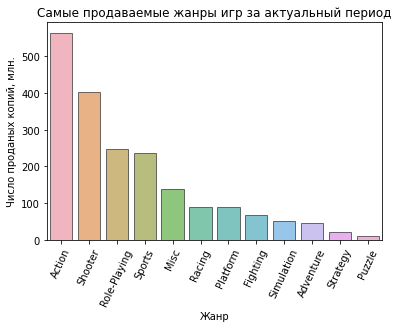

In [58]:
# построим столбчатую диаграмму
ax = sns.barplot(data=sales_per_genre, x='Жанр', y='Число проданых копий, млн.', alpha=.7, edgecolor='.2')
ax.set_xticklabels(ax.get_xticklabels(), rotation=65)
plt.title("Самые продаваемые жанры игр за актуальный период");

Самыми часто выпускаемыми играми являются игры из категории 'Action', а самыми продаваемыми - из категорий 'Action' и 'Shooter'.

In [59]:
# посмотрим на медианные продажи игр в каждом из жанров за актуальный период, возьмем топ-5
sales_per_genre = actual_data\
                    .rename(columns={'total_sales': 'Медиана кол-ва проданых копий, млн.', 'genre': 'Жанр'})\
                    .pivot_table(index='Жанр', values='Медиана кол-ва проданых копий, млн.', aggfunc='median')\
                    .sort_values(by='Медиана кол-ва проданых копий, млн.', ascending=False)\
                    .reset_index()

display(sales_per_genre.head())

,Жанр,"Медиана кол-ва проданых копий, млн."
0,Shooter,0.410
1,Sports,0.200
2,Platform,0.185
3,Fighting,0.180
4,Racing,0.160


<div style="border-radius: 15px; background:BlanchedAlmond; padding: 20px">

📜 Итог после исследования данных:
- при построении прогноза на 2017 год стоит использовать данные начиная с 2011 года
- самыми перспективными игровыми платформами за актуальный период являются PlayStation 3 и PlayStation 4, Xbox 360 и Xbox One, а также Nintendo 3DS, при этом игры на платформу Nintendo 3DS пользуются наименьшим спросом у пользователей 
- обнаружены слабые положительные корреляции между оценками пользователей или критиков и количеством проданых копий игр, однако, мнение критиков <u>скорее всего</u> (предположение, корреляция не говорит о причинно-следственных связях) оказывает большее влияние на продажи, чем мнение игроков
- самыми прибыльным жанром является 'Shooter'

</div>

## Составляем портрет пользователя каждого региона

In [60]:
# напишем функцию, которая будет строить графики зависимости числа проданных копий игр от платформы, жанра и рейтинга для указанного региона
def top5_region(region_sales, region_name):
    top5_genre = actual_data\
                    .rename(columns={region_sales: 'Число проданых копий в регионе, млн.', 'genre': 'Жанр'})\
                    .pivot_table(index='Жанр', values='Число проданых копий в регионе, млн.', aggfunc='sum')\
                    .sort_values(by='Число проданых копий в регионе, млн.', ascending=False)\
                    .reset_index()\
                    .head(5)

    top5_platform = actual_data\
                    .rename(columns={region_sales: 'Число проданых копий в регионе, млн.', 'platform': 'Платформа'})\
                    .pivot_table(index='Платформа', values='Число проданых копий в регионе, млн.', aggfunc='sum')\
                    .sort_values(by='Число проданых копий в регионе, млн.', ascending=False)\
                    .reset_index()\
                    .head(5)
    
    top5_rating = actual_data\
                    .rename(columns={region_sales: 'Число проданых копий в регионе, млн.', 'rating': 'Рейтинг'})\
                    .pivot_table(index='Рейтинг', values='Число проданых копий в регионе, млн.', aggfunc='sum')\
                    .sort_values(by='Число проданых копий в регионе, млн.', ascending=False)\
                    .reset_index()\
                    .head(5)
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    sns.barplot(data=top5_platform, x='Платформа', y='Число проданых копий в регионе, млн.', alpha=.7, edgecolor='.2', ax=axes[0])
    sns.barplot(data=top5_genre, x='Жанр', y='Число проданых копий в регионе, млн.', alpha=.7, edgecolor='.2', ax=axes[1])
    sns.barplot(data=top5_rating, x='Рейтинг', y='Число проданых копий в регионе, млн.', alpha=.7, edgecolor='.2', ax=axes[2])
    fig.suptitle(region_name)

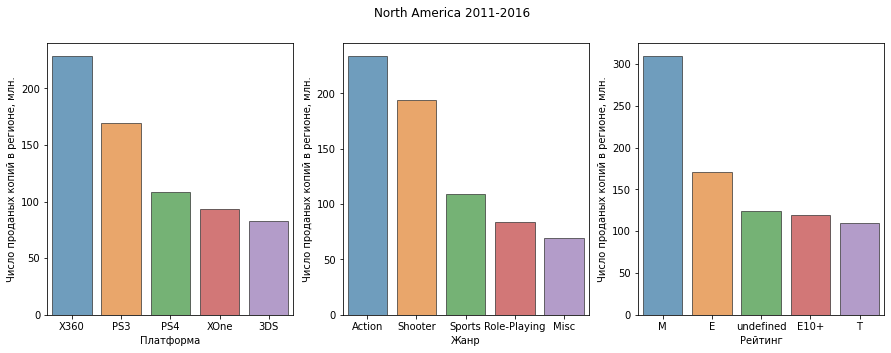

In [61]:
# для North America
top5_region('na_sales', 'North America 2011-2016')

<div style="border-radius: 15px; background:BlanchedAlmond; padding: 20px">

📜 Итог для пользователей из региона North America за период 2011-2016 года:
- Топ игровых приставок: X360, PS3, PS4, XOne, 3DS
- Топ жанров игр: Action, Shooter, Sports, Role-Playing, Misc
- Топ рейтингов игр : «Для взрослых» , «Для всех», «без рейтинга/не определен»,  «Для всех от 10 лет и старше», «Подросткам»

</div>

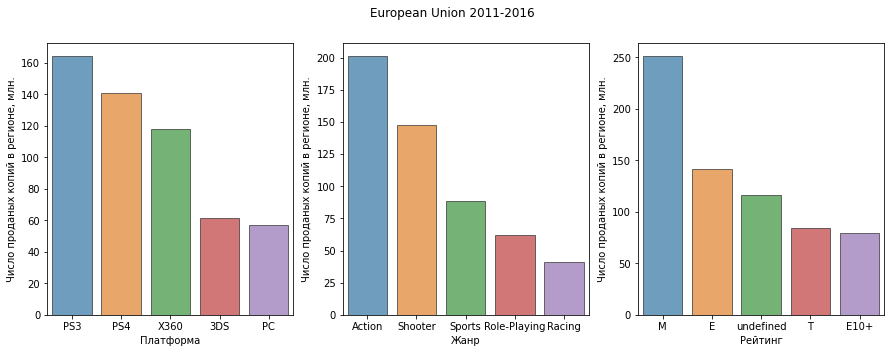

In [62]:
# для European Union
top5_region('eu_sales', 'European Union 2011-2016')

<div style="border-radius: 15px; background:BlanchedAlmond; padding: 20px">

📜 Итог для пользователей из региона North America за период 2011-2016 года:
- Топ игровых приставок: PS3, PS4, X360, 3DS, PC
- Топ жанров игр: Action, Shooter, , Sports, Role-Playing, Racing
- Топ рейтингов игр : «Для взрослых» , «Для всех», «без рейтинга/не определен», «Подросткам», «Для всех от 10 лет и старше» 

</div>

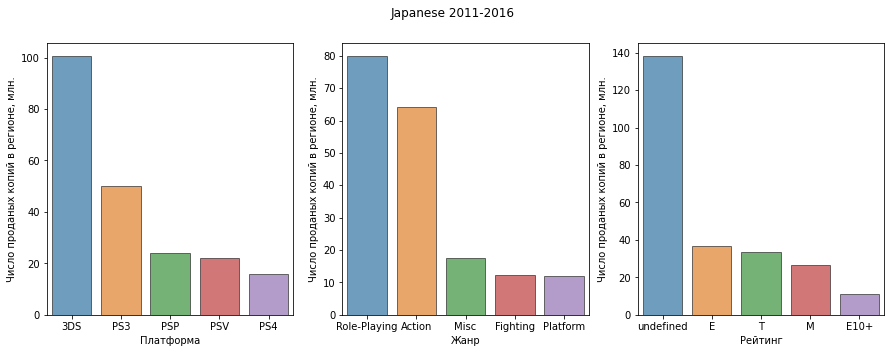

In [63]:
# для Japanese
top5_region('jp_sales', 'Japanese 2011-2016')

<div style="border-radius: 15px; background:BlanchedAlmond; padding: 20px">

📜 Итог для пользователей из региона North America за период 2011-2016 года:
- Топ игровых приставок: 3DS, PS3, PSP, PSV, PS4 
- Топ жанров игр: Role-Playing, Action, Misc, Fighting,  Platform
- Топ рейтингов игр : «без рейтинга/не определен», «Для всех», «Подросткам», «Для взрослых» , «Для всех от 10 лет и старше»
<br>
<br>Данные показывают, что предпочтения японских геймеров коренным образом отличаются от предпочтений европейцев и американцов как в выборе игровых палатформ, так и в выборе жанров.    
    
</div>

## Проверяем гипотезы

### **Проверка гипотезы:** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

***
```
H_0: Средние пользовательские рейтинги (user_score) пользователей платформы Xbox One = средние пользовательские рейтинги (user_score) пользователей платформы PC
H_a: Средние пользовательские рейтинги (user_score) пользователей платформы Xbox One ≠ средние пользовательские рейтинги (user_score) пользователей платформы PC
alpha = 0.05
```
***

Предположим, что оптимизация, наполненность контентом и другие критерии для игр на платформах XOne и PC могут оличаться, следовательно, оценки пользователей будут формироваться для игр независимо. Для проверки гипотезы используем независимый выборочный t-тест.

In [64]:
results = st.ttest_ind(actual_data[actual_data['user_score'].isna() == False].query('platform == "XOne"').user_score,
                        actual_data[actual_data['user_score'].isna() == False].query('platform == "PC"').user_score)

alpha = .05

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.5904414434867319
Не получилось отвергнуть нулевую гипотезу


### **Проверка гипотезы:** Средние пользовательские рейтинги жанров Action и Sports разные

***
```
H_0: Средние пользовательские рейтинги (user_score) жанра Action = средние пользовательские рейтинги (user_score) жанра Sports
H_a: Средние пользовательские рейтинги (user_score) жанра Action ≠ средние пользовательские рейтинги (user_score) жанра Sports
alpha = 0.05
```
***

Предположим, что оценки пользователей для двух разных жанров выставляются независимо. Для проверки гипотезы используем независимый выборочный t-тест.

In [65]:
results = st.ttest_ind(actual_data[actual_data['user_score'].isna() == False].query('genre == "Action"').user_score,
                        actual_data[actual_data['user_score'].isna() == False].query('genre == "Sports"').user_score)

alpha = .05

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 4.676342911395105e-24
Отвергаем нулевую гипотезу


## Общий вывод

<div style="border-radius: 15px; background:BlanchedAlmond; padding: 20px">
    
Предоставленные для анализа данные из открытых источников о продажах игр, оценках пользователей и экспертов, жанрах и платформах были предварительно обработаны перед работой: 
+ удалены строки с пропусками в полях "название" и "жанр", а также строки с пропусками "год выхода игры", которые не удалось заполнить (суммарно 108 строк);
+ с помощью обогащения данных часть пропусков в столбце "год выхода игры" была дополнительно заполнена (102 значение);
+ значения 'tbd' в ячейках столбца "оценка пользователей" были заменены на NaN (2333 значения);
+ необходимые столбцы были приведены к правильным типам данных;
+ посчитаны суммарные продажи по всем регионам;
+ в общей сложности, на этапе предобработки потеряно чуть более 1% данных.

<br>
В результате представленного исследования были выделены ключевые закономерности, определяющие успешность игрового проекта:

1. **Обнаружен спад количества выпускаемых игр для консолей и персональных компьютеров после 2008 года**
<br>Предположительно, это можно связать с потерей интереса у аудитории (развитие мобильного гейминга, облачного гейминга, широким распространением онлайн проектов).
2. **Cамыми перспективными игровыми платформами являются PlayStation 3 и PlayStation 4, Xbox 360 и Xbox One, а также Nintendo 3DS**
<br>Стоит отметить, что игры для платформы Nintendo 3DS пользуются наименьшим спросом у пользователей и являются перспективными преимущественно в Японии.
3. **Ставку на игры для новых консолей стоит делать через несколько лет после их появления на рынке**
<br>Пиковые продажи игр для новых консолей отмечаются через 4-5 лет после старта продаж этих игровых систем.
4. **Оценки критиков и пользователей взаимосвязаны с продажами игр, но не сильно** 
<br>Обнаружены слабые корреляционные связи меджу оценками критиков и количеством проданных копий игр. <u>Предположительно</u>, оценки критиков вносят больший вклад в продажи (корреляция не говорит о причинно-следственных взаимосвязях). При этом связи между оценками игроков и количеством проданных копий игр не обнаружено.
5. **Самым прибыльным жанром является 'Shooter'**
    
<br>
Были составлены портреты для пользователей каждого изученного региона:
    
1. Для **Северной Америки** за период 2011-2016 года самые популярные игровые консоли - Xbox 360 и PlayStation 3; самые популярные жанры - Action и Shooter; предпочитаемый рейтинг игры - «для взрослых».
2. Для жителей **Европы** за период 2011-2016 года предпочтительными были игровые платформы PlayStation 3, PlayStation 4 и Xbox 360. Самыми популярными жанрами также являются Action и Shooter. В приоритете игры с рейтингом «для взрослых».
3. **Япония** является самым уникальным из всех проанализированнх регионов. В течение 2011-2016 годов топ игровых приставок возглавляет Nintendo 3DS; ползователи предпочитают Role-Playing и Action игры остальным жанрам, а самые популярные рейтинги игр - «без рейтинга/не определен», «для всех» и «подросткам».

<br>
В ходе проведенного исследования было также обнаружено:

+ После 2011 года в пятерку лидеров по популярности (и, соответсвенно, по продажам) выбились игры для консолей PlayStation 4, Nintendo 3DS и Xbox One.
+ Срок жизни новой игровой платформы обычно не превышает 10 лет.
+ Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
+ Средние пользовательские рейтинги жанров Action и Sports разные.
    
</div>